# Intraday Trading via Day Trading Techniques & Indicators
---

### Data collected via AlphaVantage free API using extended intraday data. 
> https://www.alphavantage.co/documentation/

---

# 03 - Exploratory Data Analysis

### Library Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.stattools import adfuller
# Code written by Joseph Nelson.
def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

# Read in Filtered Dataset

In [2]:
df = pd.read_csv('../01_Data/extended_intraday_SPY_1min_filtered.csv')
df.set_index(pd.DatetimeIndex(df['time']), inplace=True)
df.drop(columns = ['time'], inplace = True)

In [3]:
df.head()

,open,high,low,close,volume,vwap,vwap_Distance,vwap_1std_above,vwap_1std_above_Distance,vwap_2std_above,...,vwap_3std_below_Distance,9_EMA,9_EMA_Distance,20_EMA,20_EMA_Distance,EMA_Distance,EMA_cross,target,target_multi_class,target_binary_class
time,,,,,,,,,,,,,,,,,,,,,
2019-10-28 09:00:00,292.963361,292.963361,292.944021,292.944021,4019,292.588294,0.355727,292.624673,0.319348,292.661051,...,0.464862,292.862974,0.081047,292.760888,0.183133,0.102085,above,0.000000,flat,down
2019-10-28 09:01:00,292.944021,292.953691,292.905340,292.905340,8011,292.595649,0.309691,292.628422,0.276919,292.661194,...,0.408009,292.871447,0.033894,292.774645,0.130695,0.096801,above,-0.013204,down,down
2019-10-28 09:02:00,292.924681,292.924681,292.915011,292.915011,5268,292.600448,0.314563,292.630436,0.284574,292.660424,...,0.404527,292.880160,0.034851,292.788014,0.126997,0.092146,above,0.003301,flat,up
2019-10-28 09:03:00,292.905340,292.905340,292.895670,292.905340,660,292.601021,0.304320,292.628609,0.276731,292.656198,...,0.387085,292.885196,0.020145,292.799188,0.106153,0.086008,above,-0.003301,flat,down
2019-10-28 09:04:00,292.915011,292.915011,292.895670,292.895670,2709,292.603276,0.292395,292.628085,0.267585,292.652895,...,0.366823,292.887291,0.008380,292.808376,0.087294,0.078914,above,-0.003301,flat,down


# Feature Exploration

Let's first look at our most important feature, 'close' price.

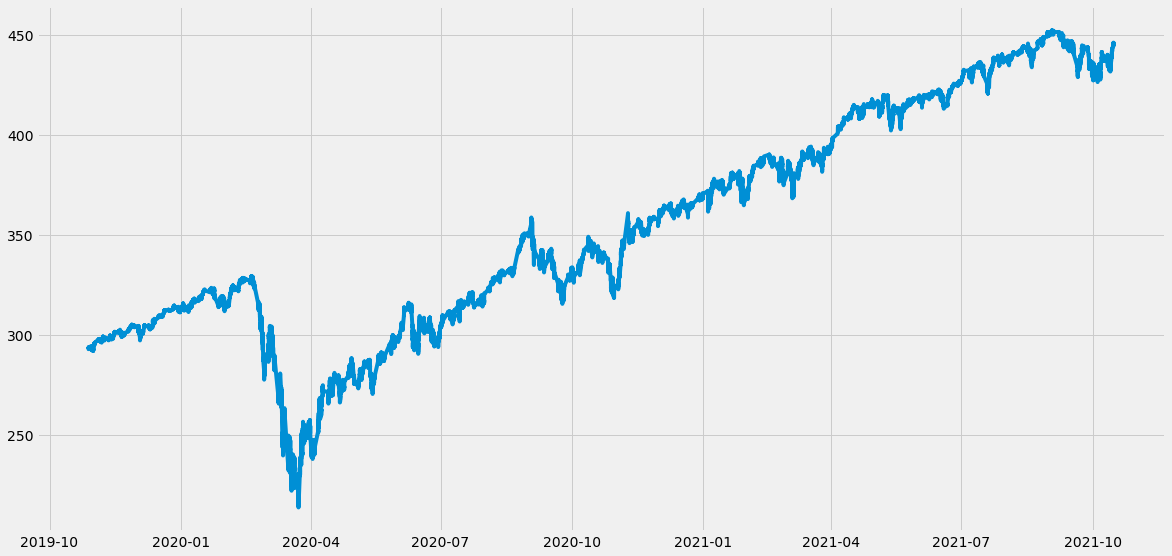

In [4]:
plt.figure(figsize=(18,9))
plt.plot(df['close']);

**We see the large drop from COVID in early 2020, but overall nothing that would upset our models.**

---
**Is our data stationary?**

To answer this question, we apply the Augmented Dickey-Fuller Test and the accompanying function written by Joseph Nelson.

In [5]:
interpret_dftest(adfuller(df['close']))

Test Statistic   -0.336123
p-value           0.920230
dtype: float64

>With a p value of .92, our data is most definitely NOT stationary. For an ARIMA model, we need our data to be stationary.

**To achieve Stationarity, we apply the .diff() function to observe the changes rather than prices.**

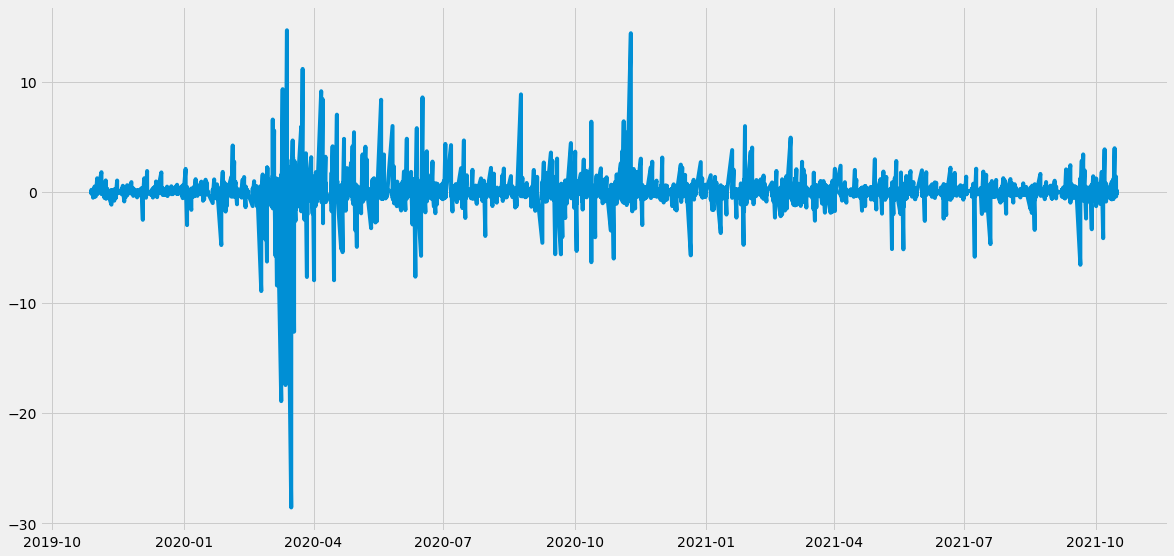

In [6]:
plt.figure(figsize=(18,9))
plt.plot(df['close'].diff());

In [8]:
interpret_dftest(adfuller(df['close'].diff().dropna()))

Test Statistic   -59.306628
p-value            0.000000
dtype: float64

>With a p value of 0, our data is stationary.

In [9]:
df['close_first_diff'] = df['close'].diff()
df.head()

,open,high,low,close,volume,vwap,vwap_Distance,vwap_1std_above,vwap_1std_above_Distance,vwap_2std_above,...,9_EMA,9_EMA_Distance,20_EMA,20_EMA_Distance,EMA_Distance,EMA_cross,target,target_multi_class,target_binary_class,close_first_diff
time,,,,,,,,,,,,,,,,,,,,,
2019-10-28 09:00:00,292.963361,292.963361,292.944021,292.944021,4019,292.588294,0.355727,292.624673,0.319348,292.661051,...,292.862974,0.081047,292.760888,0.183133,0.102085,above,0.000000,flat,down,NaN
2019-10-28 09:01:00,292.944021,292.953691,292.905340,292.905340,8011,292.595649,0.309691,292.628422,0.276919,292.661194,...,292.871447,0.033894,292.774645,0.130695,0.096801,above,-0.013204,down,down,-0.03868
2019-10-28 09:02:00,292.924681,292.924681,292.915011,292.915011,5268,292.600448,0.314563,292.630436,0.284574,292.660424,...,292.880160,0.034851,292.788014,0.126997,0.092146,above,0.003301,flat,up,0.00967
2019-10-28 09:03:00,292.905340,292.905340,292.895670,292.905340,660,292.601021,0.304320,292.628609,0.276731,292.656198,...,292.885196,0.020145,292.799188,0.106153,0.086008,above,-0.003301,flat,down,-0.00967
2019-10-28 09:04:00,292.915011,292.915011,292.895670,292.895670,2709,292.603276,0.292395,292.628085,0.267585,292.652895,...,292.887291,0.008380,292.808376,0.087294,0.078914,above,-0.003301,flat,down,-0.00967


To avoid any issues created through our diff function, we will remove null values from our dataset.

In [10]:
df.shape

(223009, 29)

In [11]:
df.dropna(inplace=True)
df.shape

(223008, 29)

As expected, this only removed the first row due to the null value created from our diff function.

**Does our data have seasonality?**

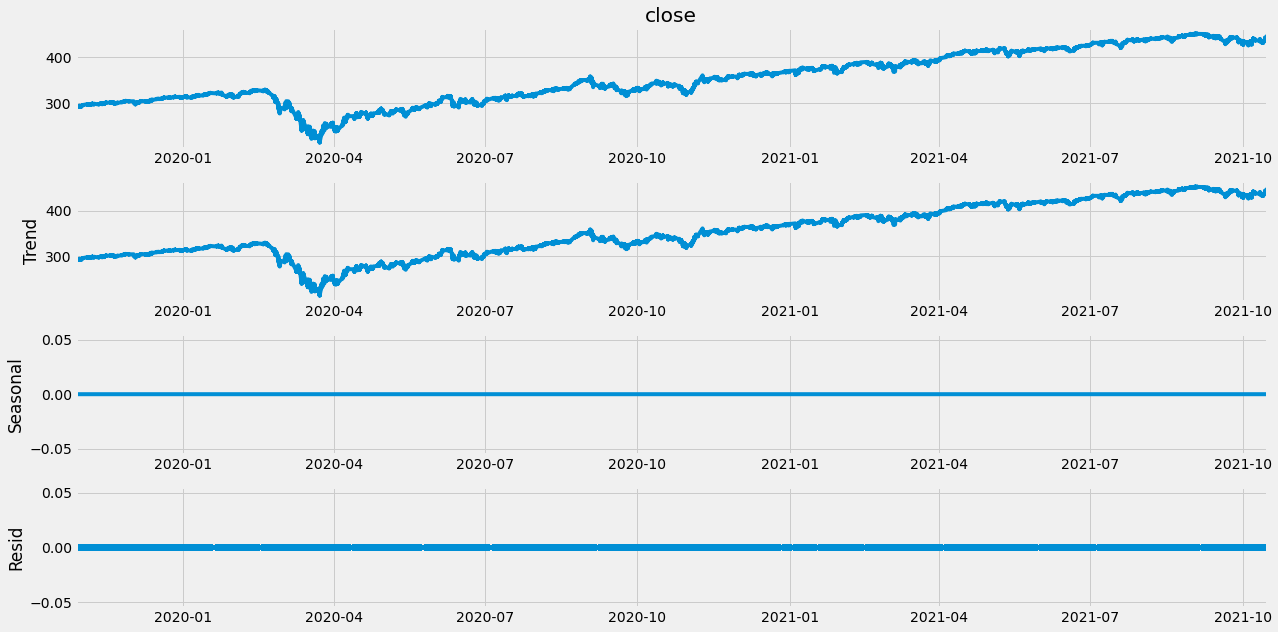

In [12]:
decomp = seasonal_decompose(df['close'], period=1)

with plt.rc_context():
    plt.rc("figure", figsize=(18,9))
    # Plot the decomposed time series.
    decomp.plot();

> Difficult to tell from this visual alone. We do not appear to have significant seasonality, but let's continue to analyze.

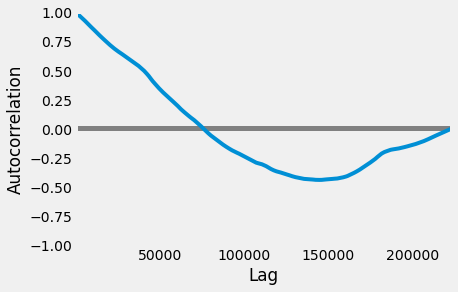

In [13]:
autocorrelation_plot(df['close']);

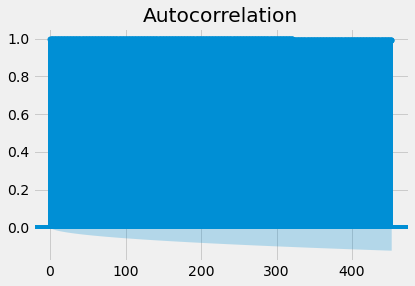

In [14]:
plot_acf(df['close'], lags=452);

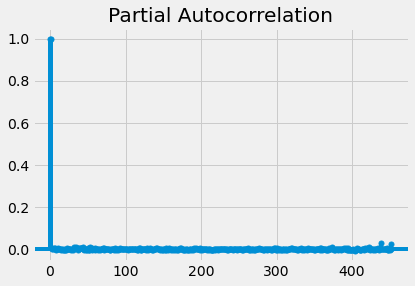

In [15]:
plot_pacf(df['close'], lags=452);

**These are difficult to interpret. Because we have such a large amount of data on 1minute intervals, its difficult to visualize a useful correlation tool.**

**We are focusing on intraday data, however, so let's try picking a random day and testing correlation inside of a day.**

In [16]:
test = df.query("time >= '2019-10-28' and time < '2019-10-29'")
test.shape

(449, 29)

We see that a typical day consists of 450 minute intervals, or about 7.5 hours. When considering that we wanted our time frame to be 9:00am to 4:30pm, we again see the 7.5 hours. So we know this was a correct split for a single day.

In [17]:
df.shape

(223008, 29)

In [18]:
df.shape[0] / 450

495.5733333333333

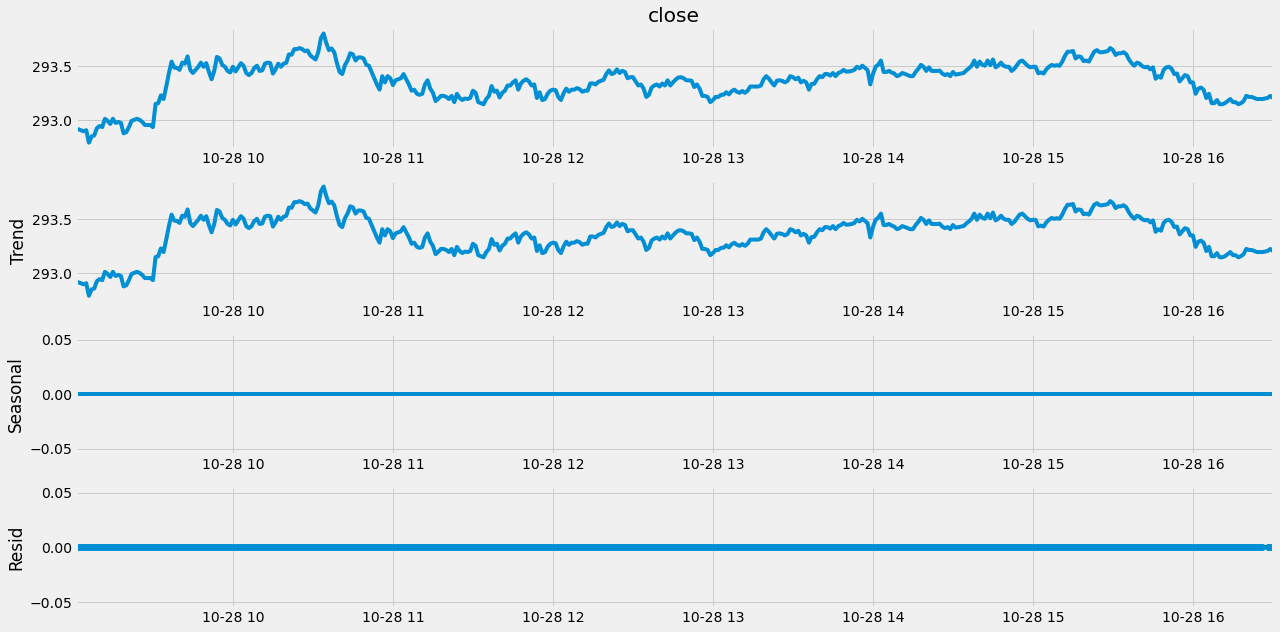

In [19]:
decomp = seasonal_decompose(test['close'], period=1)

with plt.rc_context():
    plt.rc("figure", figsize=(18,9))
    # Plot the decomposed time series.
    decomp.plot();

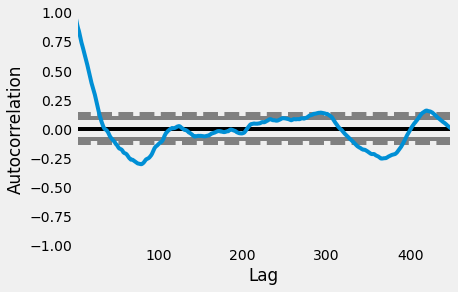

In [20]:
autocorrelation_plot(test['close']);

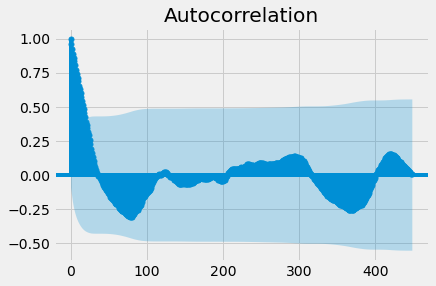

In [21]:
plot_acf(test['close'], lags=448);

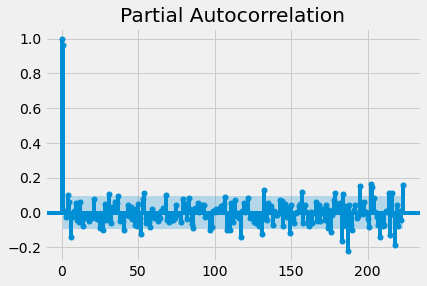

In [22]:
plot_pacf(test['close'], lags=223);

>These results are much easier to interpret. We see there is not significant correlation between close prices beyond the initial few lags, which is to be expected.

# Target Variable

**Our target variable is split into 3 columns.**
1. 'target' shows us the % move in 1 minute (already multiplied by 100)
2. 'target_binary_class' tells us if it went up or down.
3. 'target_multi_class' adds another dimension to the binary class column by including a class for if the price is relatively flat.

In [23]:
df['target'].describe()

count    223008.000000
mean          0.000095
std           0.055516
min          -1.821806
25%          -0.015569
50%           0.000000
75%           0.015948
max           2.212852
Name: target, dtype: float64

**Our mean move is only 0.000095%, even after removing most of the pre-market and after hours data.**

**However, our standard deviation is 0.056% which quickly incorporates most of our values.**
- **3 standard deviations from our mean of about 0 would be +/- 0.168**
---
This is described better visually:

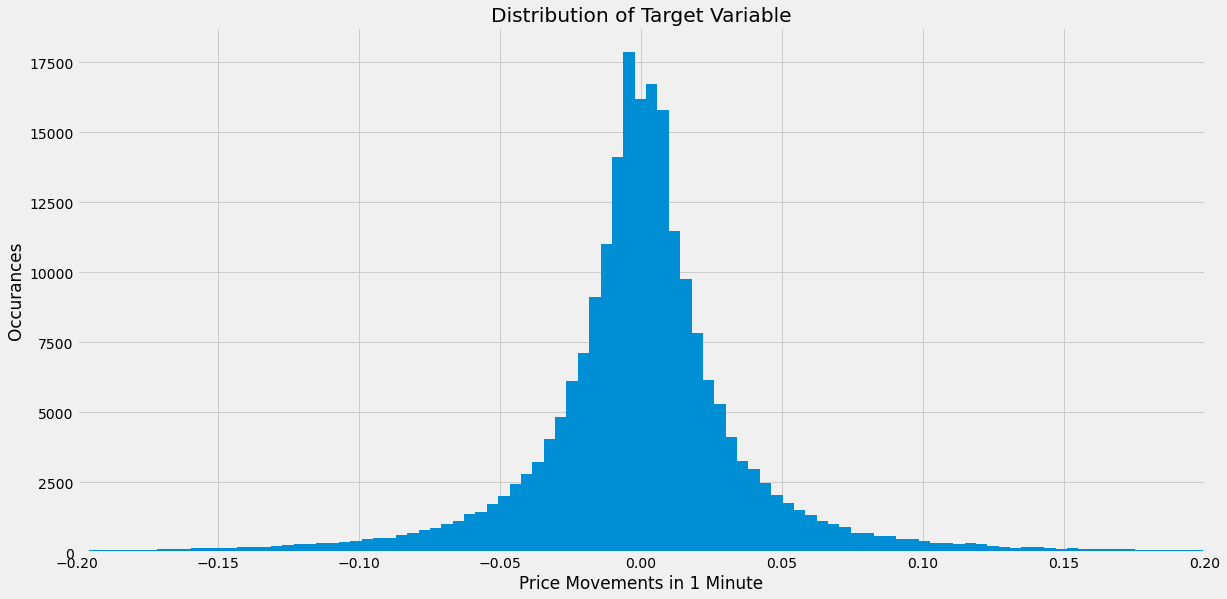

In [24]:
plt.figure(figsize=(18,9))
df['target'].hist(bins=1000)
plt.xlim(-0.2,0.2)
plt.ylabel('Occurances')
plt.xlabel('Price Movements in 1 Minute')
plt.title('Distribution of Target Variable');

> We seem to have a very normally distributed target variable with mean of about 0.

**Incorporating what we know about the S&P500, specifically the ticker SPY, we know that the stock price is very stable and we see that described here by very small movements from minute to minute.**